In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#Importacion de los datos
train = pd.read_csv("data.csv")
train = train.drop(['url','course_id'],axis=1)
train.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [43]:
#Crear categoria de rating 
train['score'] = train['num_reviews'] / (train['num_subscribers'] + 1)
train['score'] = train['score'].fillna(0)

In [44]:
train.describe()

,price,num_subscribers,num_reviews,num_lectures,profit,year,month,day,score
count,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03,3683.000000,3683.000000,3683.000000,3683.000000
mean,65.992398,3193.371165,156.448004,40.062178,2.402885e+05,2015.433342,6.162639,15.841162,0.076114
std,60.985586,9498.231406,935.078241,50.366788,1.000760e+06,1.185920,3.379314,8.780906,0.780918
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2011.000000,1.000000,1.000000,0.000000
25%,20.000000,110.000000,4.000000,15.000000,1.567500e+03,2015.000000,3.000000,8.000000,0.008848
50%,45.000000,911.000000,18.000000,25.000000,2.305000e+04,2016.000000,6.000000,16.000000,0.029142
75%,95.000000,2537.500000,67.000000,45.000000,1.182600e+05,2016.000000,9.000000,23.000000,0.091341
max,200.000000,268923.000000,27445.000000,779.000000,2.431680e+07,2017.000000,12.000000,31.000000,47.193548


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         3683 non-null   object 
 1   is_paid              3683 non-null   bool   
 2   price                3683 non-null   int64  
 3   num_subscribers      3683 non-null   int64  
 4   num_reviews          3683 non-null   int64  
 5   num_lectures         3683 non-null   int64  
 6   level                3683 non-null   object 
 7   content_duration     3683 non-null   object 
 8   published_timestamp  3683 non-null   object 
 9   subject              3683 non-null   object 
 10  profit               3683 non-null   int64  
 11  published_date       3683 non-null   object 
 12  published_time       3682 non-null   object 
 13  year                 3683 non-null   int64  
 14  month                3683 non-null   int64  
 15  day                  3683 non-null   i

In [46]:
train.isnull().sum()

course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
score                  0
dtype: int64

Antes de la exploracion de datos voy a convertir variables categoricas a numericas
Hago un foreach para cada columna, si tiene valores faltantes lo corrige y despues aplica el labelencoder

In [47]:

cols = ['is_paid','content_duration','level', 'published_timestamp', 'subject', 'published_date', 'published_time']
for col in cols:
    train[col] = train[col].fillna('missing')
    train[col] = LabelEncoder().fit_transform(train[col])

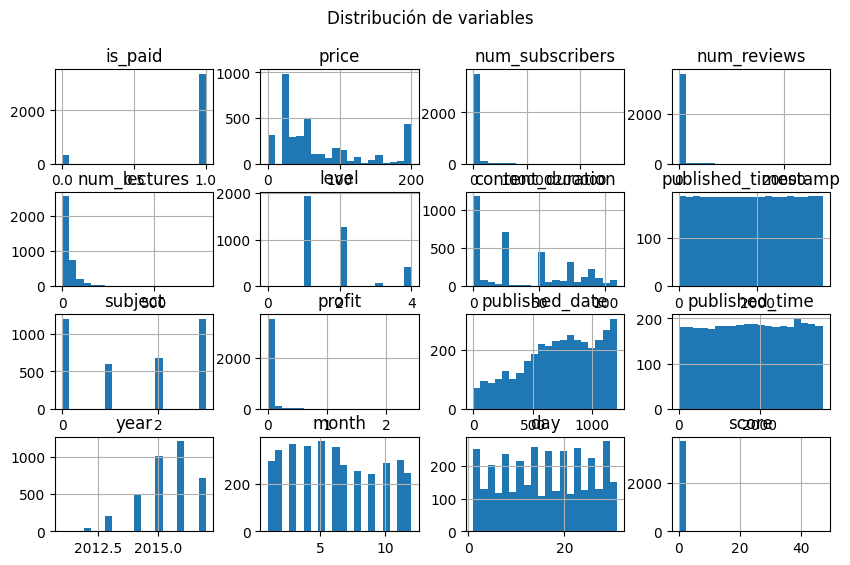

In [48]:
#Exploracion de datos
train.hist(figsize=(10,6), bins=20)
plt.suptitle("Distribución de variables")
plt.show()

Aparentemente requeriria escalado Robusto

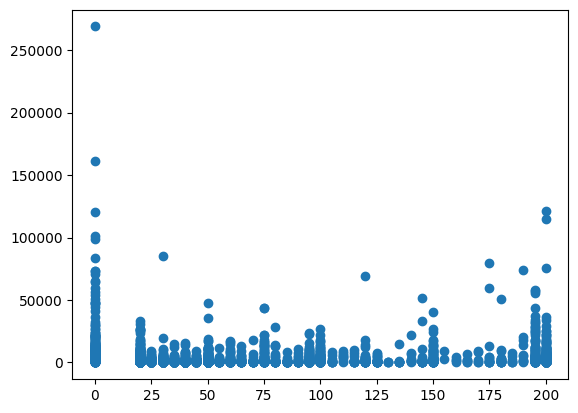

In [49]:
plt.scatter(data=train,x='price',y='num_subscribers')

In [50]:
#Escalamos
scaler = RobustScaler()
dtrain = train.drop('course_title',axis=1)
Xtrain = scaler.fit_transform(dtrain)

In [51]:
#Aplicamos PCA
pca_full = PCA(n_components=None, svd_solver='full')
pca_full.fit(Xtrain)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)
for thresh in [0.90, 0.95]:
    k = np.searchsorted(cum_explained, thresh) + 1
    print(f"N° componentes para explicar ≥ {int(thresh*100)}%: {k}")

N° componentes para explicar ≥ 90%: 3
N° componentes para explicar ≥ 95%: 3


Text(0, 0.5, 'Varianza explicada')

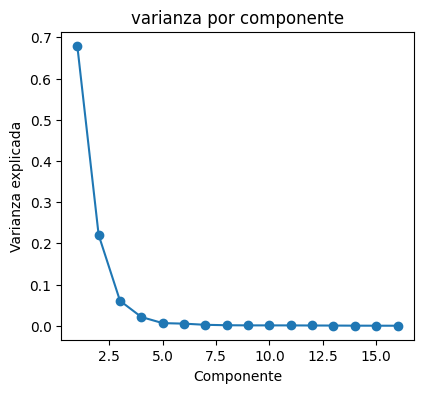

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('varianza por componente')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')


In [53]:
pca = PCA(n_components=3)
ntrain = pca.fit_transform(Xtrain)

In [54]:
#Sistema de Recomendacion
similarity_matrix = cosine_similarity(ntrain)
similarity_matrix

array([[ 1.        , -0.79229892,  0.22200992, ..., -0.54839527,
         0.12223533,  0.21356248],
       [-0.79229892,  1.        , -0.76404496, ...,  0.2164197 ,
        -0.68664319, -0.76479325],
       [ 0.22200992, -0.76404496,  1.        , ...,  0.11198271,
         0.92599681,  0.99407688],
       ...,
       [-0.54839527,  0.2164197 ,  0.11198271, ...,  1.        ,
         0.44854596,  0.20248819],
       [ 0.12223533, -0.68664319,  0.92599681, ...,  0.44854596,
         1.        ,  0.96101097],
       [ 0.21356248, -0.76479325,  0.99407688, ...,  0.20248819,
         0.96101097,  1.        ]], shape=(3683, 3683))

In [55]:
def recomendador(nombre_curso, cantidad=5):
    coincidencias = train[train['course_title'].str.lower() == nombre_curso.lower()]
    if coincidencias.empty:
        return "⚠️ No se encontró un curso con ese nombre exacto."
    indice = coincidencias.index[0]
    sim_scores = list(enumerate(similarity_matrix[indice]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:cantidad+1]]
    return train[['course_title', 'subject', 'price']].iloc[top_indices]

In [56]:
curso = "PHP & MySQL - Learn The Easy Way. Master PHP & MySQL Quickly"
print(f"Cursos similares a: {curso}\n")
print(recomendador(curso, cantidad=5))

Cursos similares a: PHP & MySQL - Learn The Easy Way. Master PHP & MySQL Quickly

                                           course_title  subject  price
3587  Css Positioning For Absolute Beginners: A Basi...        3     65
3573  Full Stack JavaScript: Learn Backbone.js, Node...        3     50
400         Finance - Ratios Analysis & Interpretations        0     30
2800  Become a Heroku Rails Ninja: Expert Level Depl...        3     50
2030  A new approach to piano and playing songs for ...        2     50
